# **Metrics on NFL Receiving Data**
### CMSC320 Fall 2024 Final Project
### By Arina Petrova, Timothy Kramer, Abigail Jenkins, Tariq Abdelkahlek, Zach Bellantoni



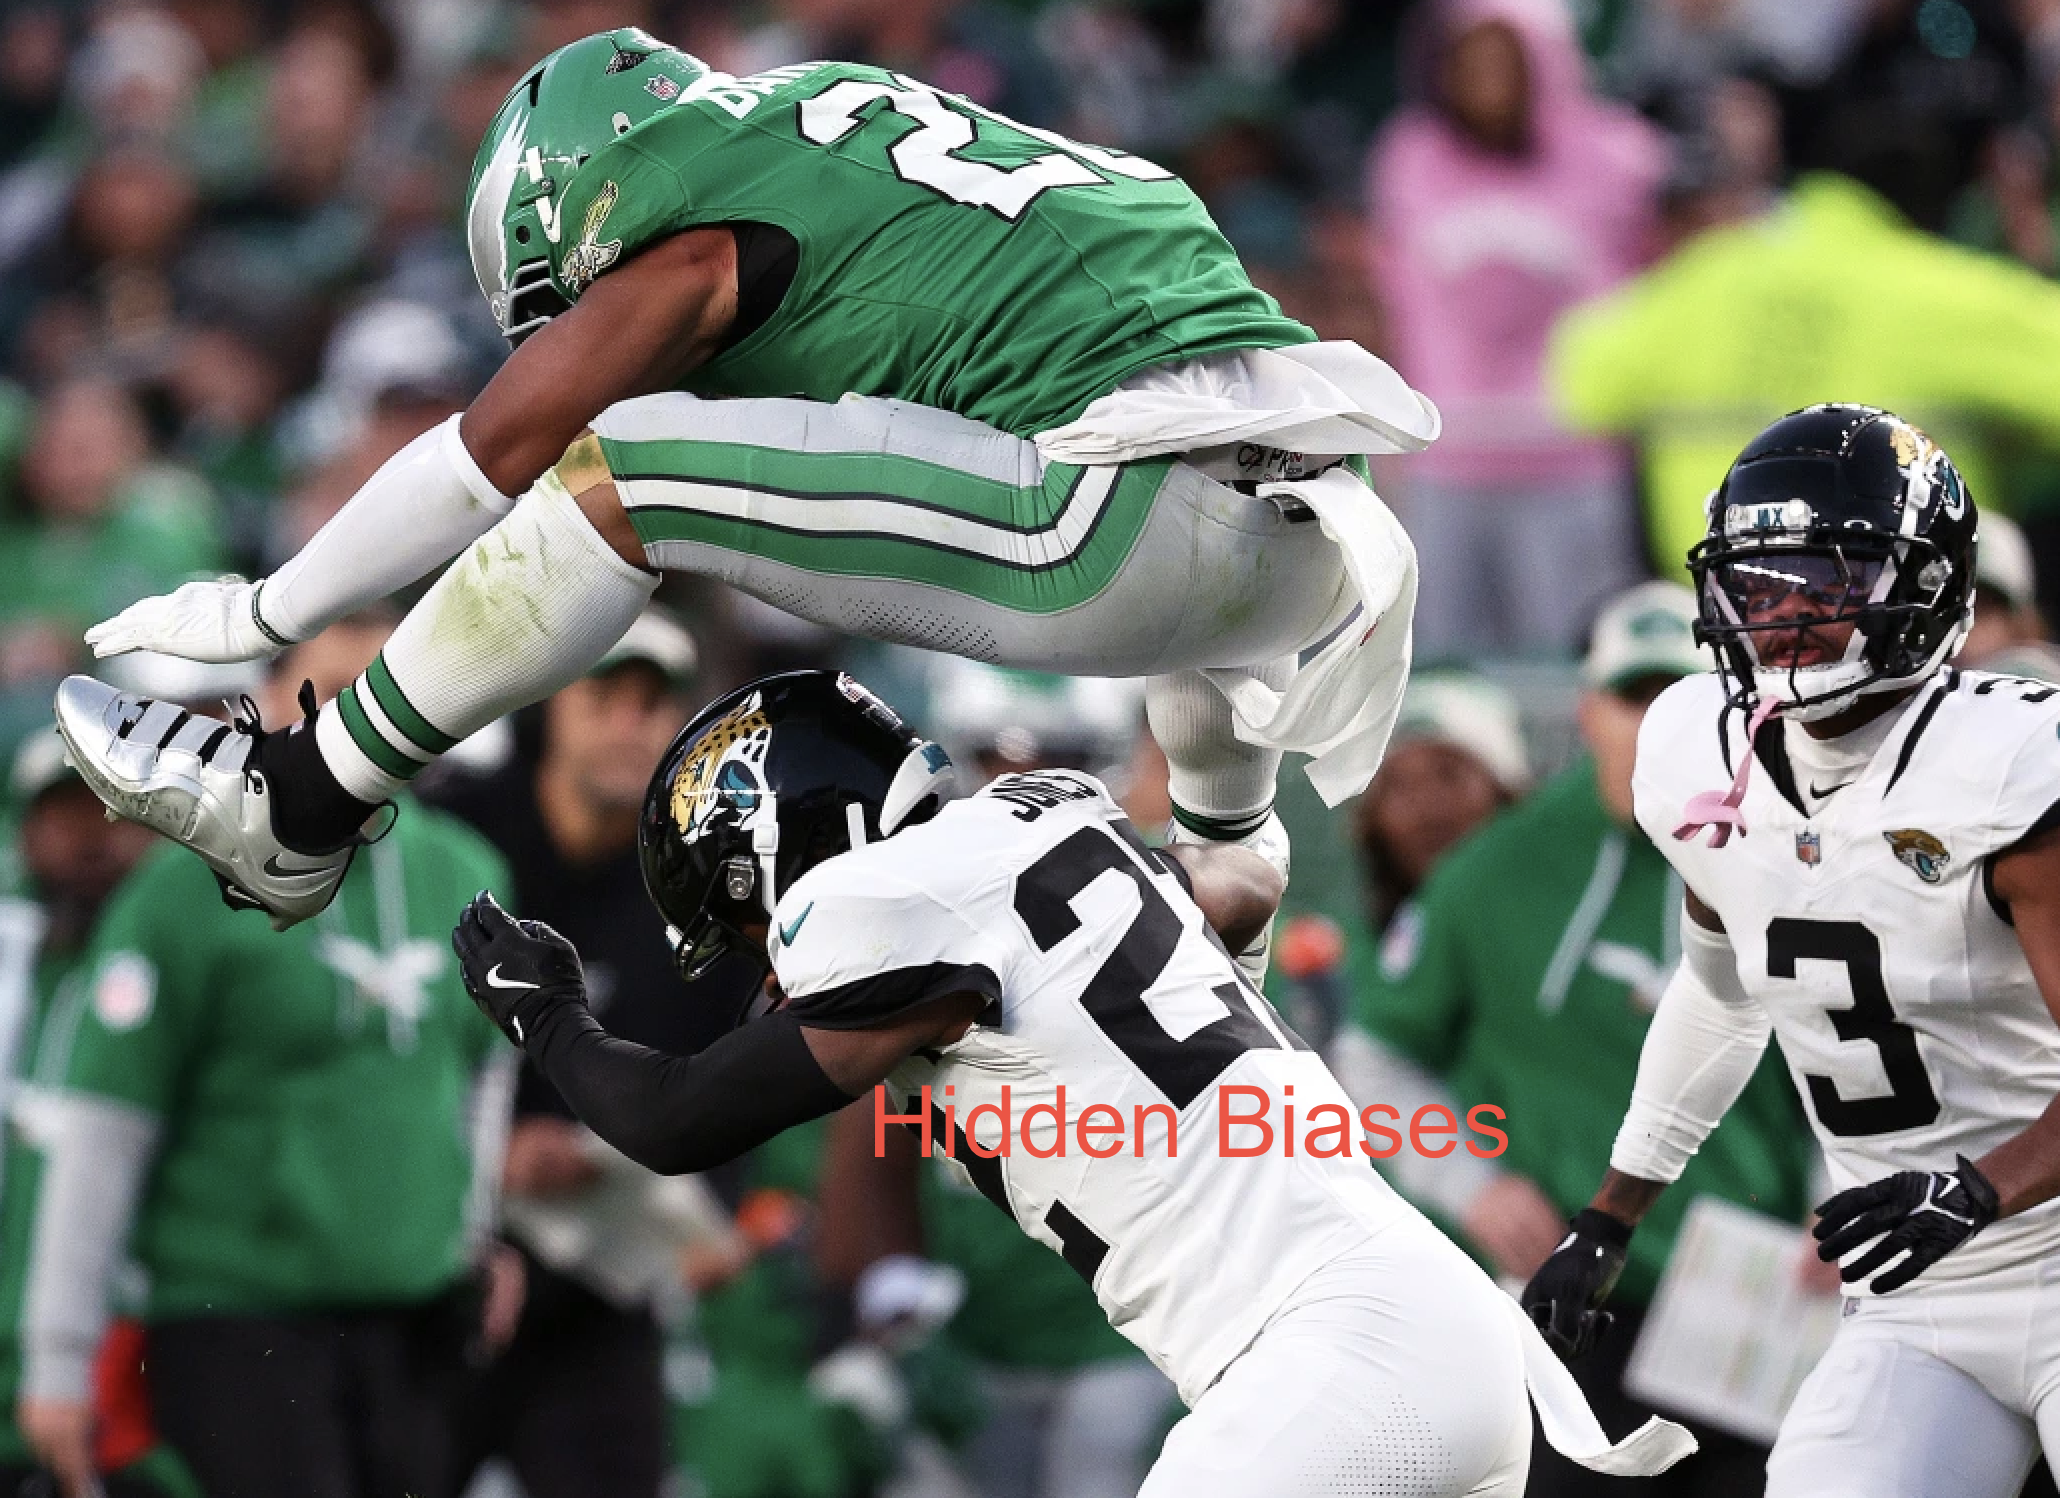

Contributions:

Arina: Created update GitHub Repository to publish deliverable and host on GitHub pages. Worked on the introduction section, text context/analysis, polishing final EDA(post hoc tests, analysis for EDA), and adding images to the project. (Sections worked on B, C, F, G)

Tariq: Created original GitHub Repository and idea for project (checkpoint 1). Worked on EDA (checkpoint 2), created and worked on topics and ideas for the full layout of the project. Revised introduction section, completed data curation section, and completed conclusion section of final deliverable. (Sections worked on: A, B, C, D, F, G)

Tim: Worked on EDA (checkpoint 2), created and worked on topics and ideas for the full layout of the project. Revised introduction section, completed conclusion section of final deliverable. Layed out steps for members to contribute to project, analysis and explanation of EDA, explanation of ML. (Sections worked on A, B, C, D, F, G)

Abby: Worked on the ML portion of the final deliverable. Used the EDA to develop ML models to further investigate our topic. (Sections worked on D, E, F, G)

Zach: Facilitated formatting throughout the final project, made needed formatting changes and aesthetic updates. Worked on conclusion for final deliverable(B,G)



# Introduction
The National Football League (NFL) scouts are always on the lookout for top talent in the field when making decisions about who joins their team. There are thousands of measures for a player’s skill level and performance, so how do they sift through to find the key indicators? The success of a football team depends largely on the skills of individual players, so being able to identify talented players with a high likelihood of success is of utmost importance. Everyone wants to be a Super Bowl winner!

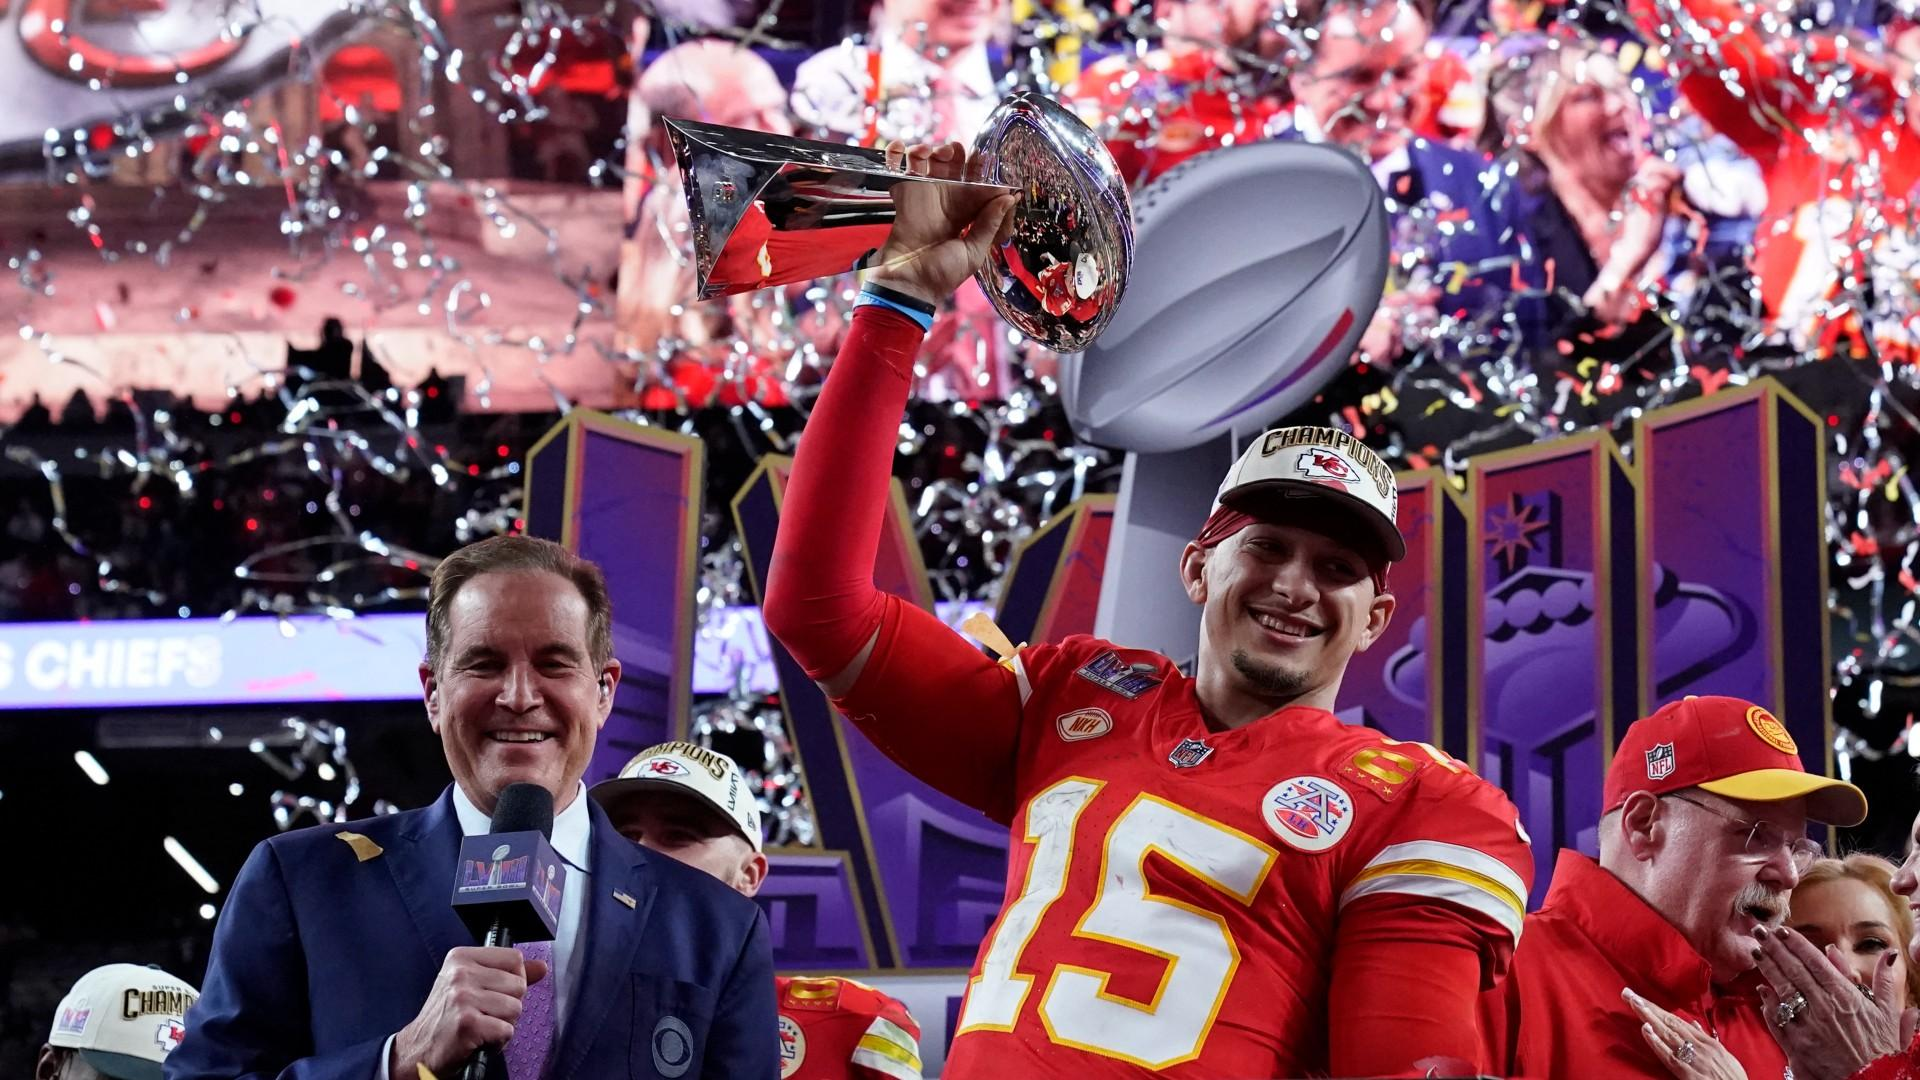
In this tutorial, we will focus on NFL Receivers, who are players whose role is to catch and run with the ball, to find which factors are most important in predicting their success in the league. We will measure success based on a number of career statistics, such as their number of years in the league, number of yards they can run with the ball, and percentage of receptions of the ball. Ultimately, we hope to display which factors play the biggest role in the success of these incoming NFL receivers.



**Helpful Football Terms Glossary**


*Reception*: Player catches the football on a forward-pass

*Rookie*: First year player

*Veteran*: A player after the first year (usually three or more years)

*Target*: When a player receives a pass to them (caught or incomplete pass)

*Target_share*: The percentage of targets to a player relative to the total targets to everyone

*PPR*: Used in fantasy football as a point style, stands for point-per-reception.



# Data Curation
To start our analysis, we need to find a database storing NFL player data. The philosophy here is in order to find the best future receivers, we must first look at the current best receivers. We want to examine the recent receiving superstars in the NFL and find what kind of factors made them special. Maybe we can find a certain metric or statistic that would help us predict a given player’s success in the game.
In order to create different visualizations and hypothesis tests to support our conclusions, we will have to find a dataset of current NFL rosters and seasonal data. The most renowned third-party NFL data tracker are the [NFLVerse](https://nflverse.nflverse.com/) packages. We can import our needed data through the API provided by the NFLVerse team. We can then create a Pandas dataframe to track these and make any necessary database merges/drops.

First, we must install the needed library - **matplotlib** - which will allow us to create interesting visualizations of our data to aid in analysis. We are also downloading the NFL dataset in this line.

In [ ]:
pip install matplotlib nfl_data_py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which i

Next, we need to import the rest of the needed libraries, such as pandas for working with dataframes, pyplot to make various plots, scipy.stats to run hypothesis and other statistical tests.

We import them "as" a shortened nickname to make it easier to refer to each library throughout the code.

In [ ]:
import nfl_data_py as nfl # imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

The NFL data has multiple dataframes within it, but we only want to extract the ones that will be most interesting for our data analysis. We extract these and assign them to two variables below and print out all of the columns in each dataset so we know what we're working with:

In [ ]:
df = nfl.import_seasonal_rosters([2023])
performance = nfl.import_seasonal_data([2023])
df.info()
performance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 0 to 3088
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   season                   3089 non-null   int32         
 1   team                     3089 non-null   object        
 2   position                 3089 non-null   object        
 3   depth_chart_position     3089 non-null   object        
 4   jersey_number            3088 non-null   float64       
 5   status                   3089 non-null   object        
 6   player_name              3089 non-null   object        
 7   first_name               3089 non-null   object        
 8   last_name                3089 non-null   object        
 9   birth_date               2835 non-null   datetime64[ns]
 10  height                   3089 non-null   float64       
 11  weight                   3089 non-null   int32         
 12  college                  3088 non-

##Now, it's time for some **data cleanup**.  

We still have two separate dataframes, but we need only one to perform data analysis easily. We merge them by joining on player_id:

In [ ]:
merge_df = performance.merge(df, how='left', left_on='player_id', right_on='player_id')

Next, we want to further refine what data we keep. We chose to only keep players that are identified as running backs, receivers, and tight ends, as these are the main positions who receive passing targets.

We also drop some observations that contain null values, and in the end we select only the columns that will be useful to us.

In [ ]:
# selecting certain positions only
merge_df = merge_df[merge_df['position'].isin(['WR', 'TE', 'RB'])]

# dropping null values
merge_df = merge_df.dropna(subset = ['draft_club', 'draft_number', 'years_exp'])

# choosing select columns to remain in the dataframe
merge_df = merge_df[['receiving_yards', 'age', 'receiving_yards_after_catch', 'receptions', 'receiving_first_downs', 'targets', 'tgt_sh', 'position', 'years_exp']]

merge_df

,receiving_yards,age,receiving_yards_after_catch,receptions,receiving_first_downs,targets,tgt_sh,position,years_exp
1,29.0,39.0,29.0,4,2.0,5,0.034014,TE,17
6,39.0,36.0,3.0,6,6.0,7,0.048611,TE,13
7,74.0,34.0,28.0,11,4.0,19,0.075697,WR,12
10,39.0,33.0,23.0,5,3.0,17,0.061594,WR,12
16,35.0,33.0,9.0,5,2.0,10,0.074074,WR,11
...,...,...,...,...,...,...,...,...,...
579,0.0,22.0,0.0,0,0.0,0,0.000000,RB,0
580,316.0,21.0,314.0,52,20.0,71,0.132959,RB,0
581,352.0,22.0,169.0,34,14.0,46,0.123324,TE,0
582,793.0,23.0,335.0,64,32.0,94,0.169982,WR,0


In addition, we want to create a new feature which will be helpful for our analysis. Currently we do not have a catch percentage from players. We will accomplish this by creating a new catch rate feature by diving player receptions by their targets.

In [ ]:
merge_df['catch_rate'] = merge_df['receptions']/merge_df['targets']

merge_df

,receiving_yards,age,receiving_yards_after_catch,receptions,receiving_first_downs,targets,tgt_sh,position,years_exp,catch_rate
1,29.0,39.0,29.0,4,2.0,5,0.034014,TE,17,0.800000
6,39.0,36.0,3.0,6,6.0,7,0.048611,TE,13,0.857143
7,74.0,34.0,28.0,11,4.0,19,0.075697,WR,12,0.578947
10,39.0,33.0,23.0,5,3.0,17,0.061594,WR,12,0.294118
16,35.0,33.0,9.0,5,2.0,10,0.074074,WR,11,0.500000
...,...,...,...,...,...,...,...,...,...,...
579,0.0,22.0,0.0,0,0.0,0,0.000000,RB,0,NaN
580,316.0,21.0,314.0,52,20.0,71,0.132959,RB,0,0.732394
581,352.0,22.0,169.0,34,14.0,46,0.123324,TE,0,0.739130
582,793.0,23.0,335.0,64,32.0,94,0.169982,WR,0,0.680851


What a comeback—this data is ready for exploration!

## Exploratory Data Analysis

In football, one of the biggest factors that classify players is their position, which determines where they line up on the field and their role in the offense. This heavily influences how often they receive the ball and is affected by factors like the game script and remaining time.

When analyzing players' receiving stats, it’s essential to consider their position and role within the team. Wide receivers (WRs) are usually the primary targets for deeper passes and complex routes, while tight ends (TEs) and running backs (RBs) often have specialized roles, such as blocking, short-yardage receiving, or serving as safety-valve options for shorter gains.



This dynamic can shift based on game situations, offensive strategies, or individual player skill sets. To analyze this, we will use an **ANOVA** (Analysis of Variances, aka a T-test for more than two groups) test to examine differences in average positional target share. This analysis can reveal which positions tend to have higher target shares, a key factor in predicting players' season totals. Understanding these positional trends is crucial for evaluating a player's receiving potential over the course of a season.











In [ ]:
#Conduct ANOVA test on WR, TE, RB on starters target share

#Null Hypothesis: There is no difference in target share between the positions of tight end, running back, receiver
#Alternate Hypothesis: There is a difference in target share between the positions of tight end, running back, receiver

tightend = merge_df[merge_df['position'] == 'TE']
runningback = merge_df[merge_df['position'] == 'RB']
receiver = merge_df[merge_df['position'] == 'WR']


(stat, p) = stats.f_oneway(tightend['tgt_sh'], runningback['tgt_sh'], receiver['tgt_sh'])
p



2.936501134601212e-14

Since this tiny p-value is smaller than the typical 0.05 alpha level, we have found statistically significant evidence that the position a player has will affect the rate they receive a ball.  We are able to reject the null hypothesis as there is a correlation between the two factors. Lets visualize this result using a boxplot so that it is easier to understand:

Text(0, 0.5, 'Target Share')

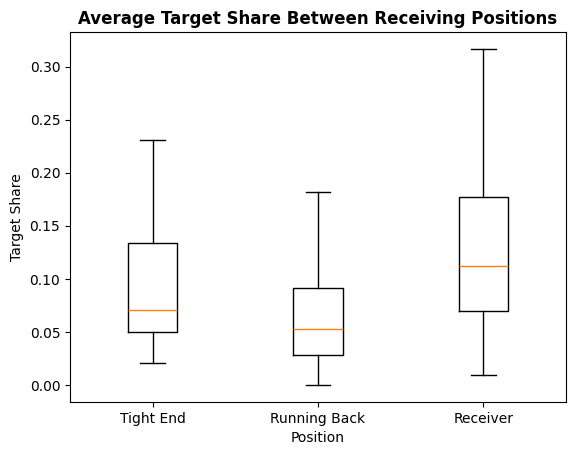

In [ ]:
#Create plot showing differences between all three positions (plot for ANOVA)

plt.boxplot([tightend['tgt_sh'], runningback['tgt_sh'], receiver['tgt_sh']], labels = ["Tight End", "Running Back", "Receiver"])
plt.title("Average Target Share Between Receiving Positions", fontweight = "bold")
plt.xlabel("Position")
plt.ylabel("Target Share")

Clearly, there are some visible differences between the different positions target shares. Given that we rejected the null hypothesis of our ANOVA test, we want to apply a Post-Hoc test to learn more about the differences between each position. We will use **Tukey's Honestly Significant Difference (HSD)** test, which is designed to identify where the differences lie between group means.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# combine data into a single DataFrame
position_data = pd.concat([
    tightend.assign(position='TE')[['tgt_sh', 'position']],
    runningback.assign(position='RB')[['tgt_sh', 'position']],
    receiver.assign(position='WR')[['tgt_sh', 'position']]
])

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=position_data['tgt_sh'], groups=position_data['position'], alpha=0.05)

print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    RB     TE   0.0304 0.0038 0.0083 0.0526   True
    RB     WR   0.0662    0.0 0.0471 0.0853   True
    TE     WR   0.0358 0.0001 0.0156  0.056   True
--------------------------------------------------


Looking at the p-adj column for each row comparing the different positions, we see that all of the groups have significant differences between their respective means.

Using these two tests, we confirmed our belief that the position of a player that can potentially catches the ball will significantly impact how many balls they are able to catch.



---



### Another EDA angle:

A common stereotype in football is that rookies tend to "play it safe," avoiding contact compared to their seasoned counterparts. This suggests that rookies might record fewer **Yards After Catch** (YAC)—the distance a player covers after catching the ball—possibly due to hesitation or inexperience.  This perception of rookies often fades as players gain experience. To evaluate this belief, we will conduct a two-sample t-test to compare the average YAC between rookies and veteran players. This analysis will help determine whether experience significantly impacts how players handle receiving opportunities and contact.









In [ ]:
#Conduct 2-sample T test

#Null Hypothesis: There is no difference between receiver Yards After Completion between Veterans (3+ year experience) and Rookies (0 year experience)
#Alternate Hypothesis: There is a difference between receiver Yards After Completion between Veterans (3+ year experience) and Rookies (0 year experience)

merge_df_rookies = merge_df[merge_df['years_exp'] == 0] #get players who are rookies
merge_df_veterans = merge_df[merge_df['years_exp'] >= 3] #get players who are veterans

merge_df_rookies_yac = merge_df_rookies['receiving_yards_after_catch'] #get players who are rookies YAC
merge_df_veterans_yac = merge_df_veterans['receiving_yards_after_catch'] #get players who are veterans YAC

merge_df_rookies_yac_mean = merge_df_rookies['receiving_yards_after_catch'].mean() #get players who are rookies mean YAC
merge_df_veterans_yac_mean = merge_df_veterans['receiving_yards_after_catch'].mean() #get players who are veterans mean YAC

(stat, p) = stats.ttest_ind(merge_df_rookies_yac, merge_df_veterans_yac)
p

0.8315120448897245

Hmmmm, this test produced a different result than the ANOVA test, as we did not find statistically significant evidence that there was any difference in the Yards After Catch between new players and experienced players. We failed to reject our null hypothesis, and we cannot prove from this test alone the correlation. However, this is an interesting conclusion, as it goes against the commonly held belief that more experienced players have higher yards after catch numbers. What a sigh of relief for Rookies!

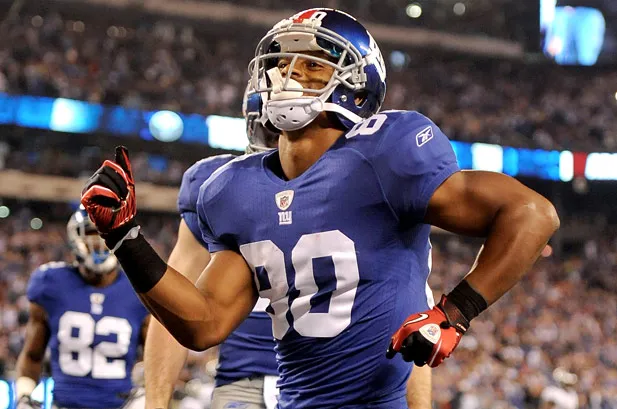

##Experience vs Recieving Yards
The relationship between experience and receiving yards is not straightforward, being influenced by numerous factors, such as athleticism, offensive schemes, team dynamics, competition, and much more. By examining the correlation between a player's years of experience and their seasonal receiving yards, we aim to get a base correlation despite the many confounding variables, to potentially highlight contradicting trends Does more experience consistently lead to better performance, or do external factors outweigh the influence of tenure? While this analysis may not yield definitive conclusions, it could highlight trends that require deeper analysis.


In [ ]:
#Taking the correlation between the two varaibles.
r_value = merge_df['years_exp'].corr(merge_df['receiving_yards'])
r_value

0.06258936915671759

Based on our r coefficient of 0.0625, We see that there is not a strong correlation between the two as the r value is close to 0. Other factors, such as target share, team role, position, or offensive scheme, may play a more significant role in influencing receiving performance, which we will look to examine.

Here is a scatter plot showcasing our findings:

Text(0, 0.5, 'Recieving yards')

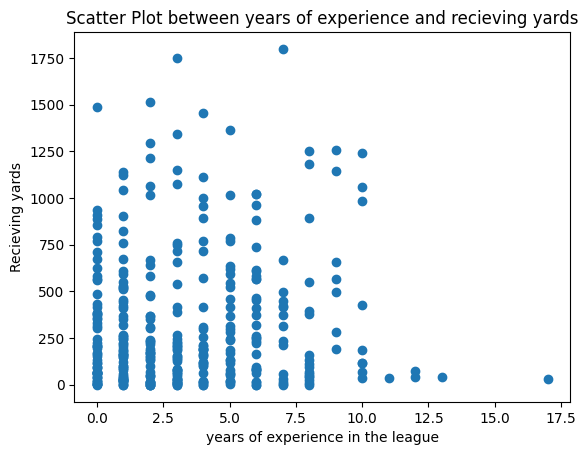

In [ ]:
#Create scatter plot showing difference between years of experience and recieving yards

plt.scatter(merge_df['years_exp'], merge_df['receiving_yards'])
plt.title("Scatter Plot between years of experience and recieving yards")
plt.xlabel("years of experience in the league")
plt.ylabel("Recieving yards")

As you can see, there is not a super strong and clear correlation between the varaibles. In order to draw a concluson we will need further analysis.

## Catch rate vs Target Share
Catch rate —the ratio of catches vs the number of passes thrown their way - and target share - the proportion of a team's total pass attempts directed at a player - are two crucial statistics for receiving players in the NFL. These statistics highlight their role in the offense, through analysis, We can examine players who are more frequently targeted and what the relationship between target share is.
A high target share might indicate trust from the quarterback,  but could also lead to more challenging situations, like facing double coverage or receiving off-target throws. Conversely, players with a lower target share may only be thrown to in high-probability situations, inflating their catch percentage. By analyzing this correlation, we can uncover whether there's a trade-off between opportunity and efficiency or if consistent performers thrive regardless of how much they are relied upon in the passing game. This analysis is important not just for evaluating individual players, but also for understanding how teams might optimize their passing strategies.


In [ ]:
#Conduct correlation examination between years of catch rate and  target share
r_value = merge_df['tgt_sh'].corr(merge_df['catch_rate'])
r_value

-0.05040101923654016

The r-value of -0.050 indicates a very weak negative correlation between target share and catch rate.
This suggests that as a player's target share increases, their catch rate slightly decreases. However, the relationship is extremely weak, meaning target share is not a significant predictor of catch rate based on this data.

Text(0, 0.5, 'Catch rate')

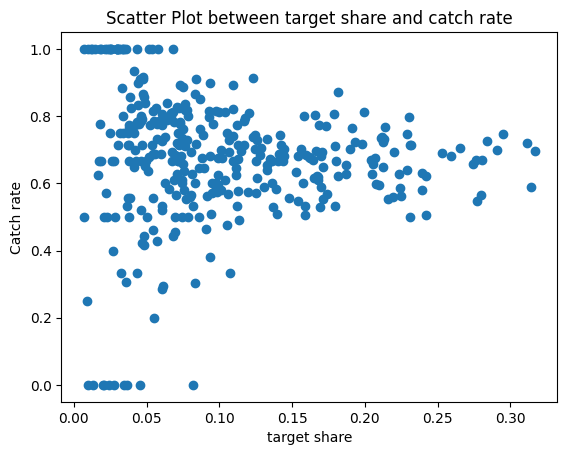

In [ ]:
# Scatter plot showing difference between target share and catch rate

plt.scatter(merge_df['tgt_sh'], merge_df['catch_rate'])
plt.title("Scatter Plot between target share and catch rate")
plt.xlabel("target share")
plt.ylabel("Catch rate")

# ML and Primary Analysis

First we preprocess the data by setting up feature and label dataframes and dropping na values. We convert positions to one hot encoding, scale the features using minmax scaling, and split into training and testing datasets with 20% of the data being testing. We do this using the sklearn model for splitting data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Setting up feature and label dataframes
X = merge_df[["targets", "position", "years_exp", "catch_rate"]].copy()
y = merge_df["receiving_yards"]

# Drop na values
X.dropna(inplace=True)
y = y.loc[X.index]

# Convert positions using one hot encoding
X = pd.get_dummies(X, columns=['position'])

# Scale the features using minmax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=42)  # Added random_state for reproducibility

Then we must fit and score the model. For linear regression, the primary metric used to score the model is the R2 score, which is the proportion of variance predicted by the independent variables, in this case being the chosen features. This score typically ranges between 0 and 1, with 0 being low and 1 being high.

In [ ]:
from sklearn.linear_model import LinearRegression

# Fitting and scoring the model
model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.9195195291657154

A score of 0.9195 is very high being very close to 1, indicating that the model explains a very high proportion of the variance in the number of receiving yards based on the chosen features.

The model prioritizes important features when predicting an output by giving them a higher weight. We can look at which features are most important by their coefficients. We do this by using feature importance, which is a built in feature that looks at which variables of the training are the most impactful.

       feature   importance
0      targets  1523.403014
2   catch_rate    85.214717
1    years_exp    56.279810
5  position_WR    40.439345


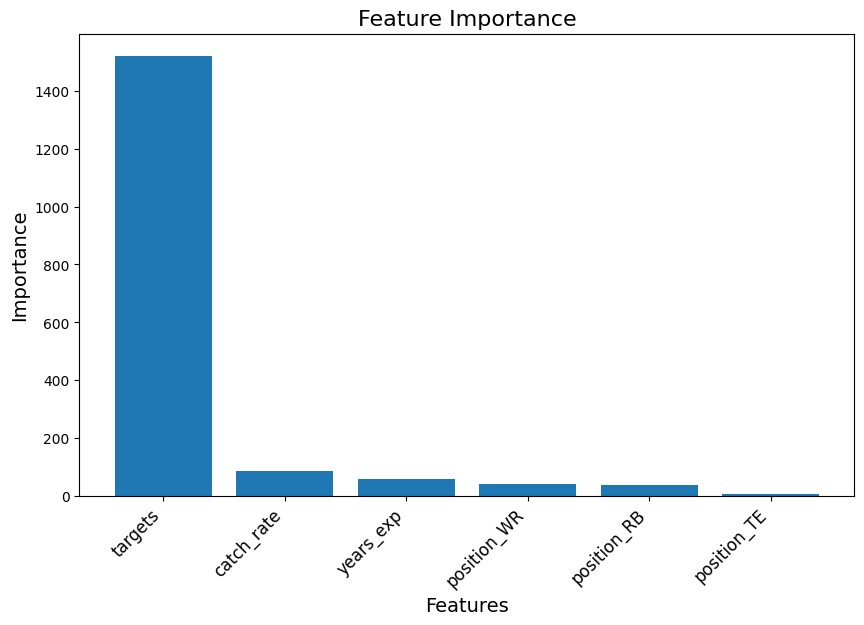

In [ ]:
coefficients = model.coef_

# Creating feature importance dataframe using coefficients
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(coefficients)
})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Prints the top 4
print(feature_importance_df.head(4))

# Plots the features by their importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df["feature"], feature_importance_df['importance'])
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

# Visualization(s) of Data

We can visualize data by looking at the predicted data versus the actual data. The first plot compares the two values, with perfectly predicted data falling on the dotted line. The second plot is graphing the residual values, with the third plot showing their distribution. We can see that they are clustered around the center, which means that our data is more commonly closer to the actual value.

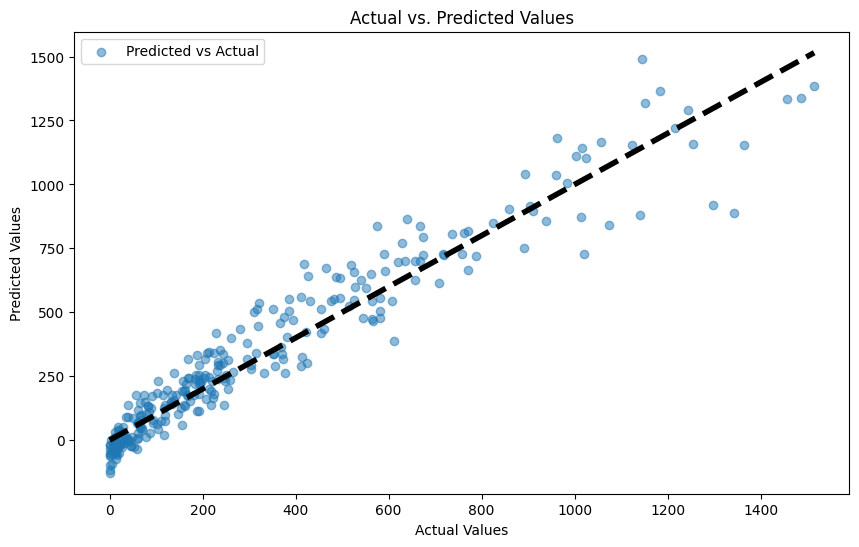

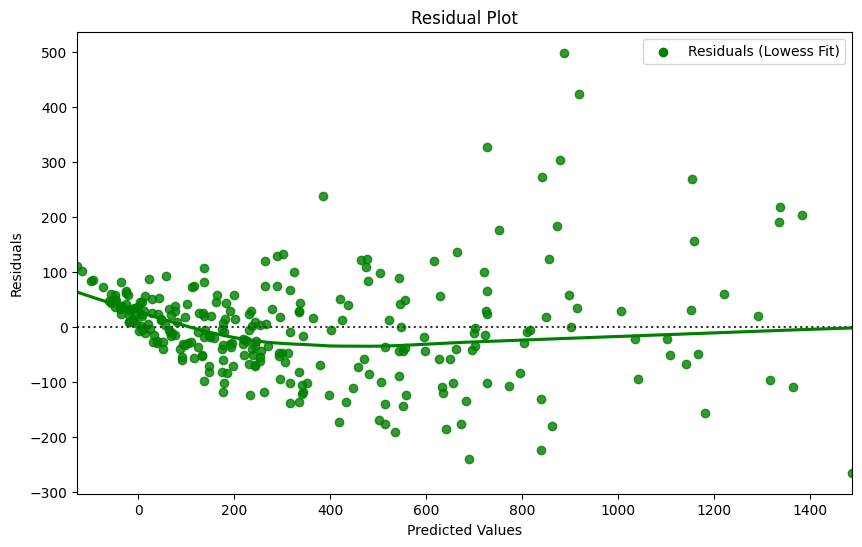

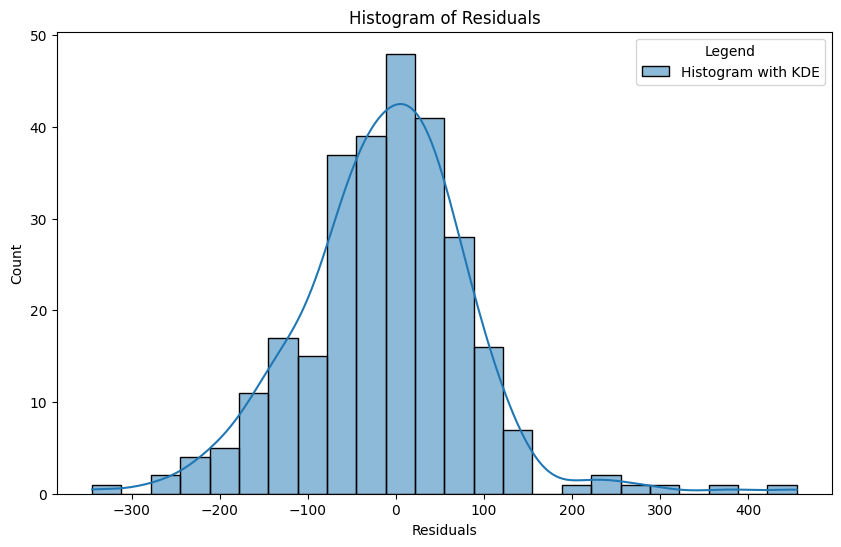

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

# Plotting the predicted data vs the actual data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect prediction
plt.legend()
plt.show()

# Graphing the residual values
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.scatter([], [], color='g', label='Residuals (Lowess Fit)')
plt.legend()
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plotting the distributions of the residual values
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, label='Histogram with KDE')
plt.legend(title='Legend')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

#  ***Conclusion***

After reviewing the analysis and insights from the graphs we are able to gain a deeper understanding of receiving in the NFL. The strongest correlation was between targets and yards, shown in our feature importance and in the correlations. We also can see the different levels of impact that the different factors have, with catch rate having more importance in both our model and our exploratory analysis.


An uninformed reader would gain a solid understanding of the key metrics used to evaluate NFL receivers and their performance. These metrics include target share, catch percentage, and years of experience, which are calculated utilizing the NFLVerse package. The project’s use of ANOVA tests and correlation analysis help break down these concepts and make them understandable for someone new to football analytics. The use of real world examples and NFL knowledge of the authors clearly demonstrate how the metrics directly relate to player success on the field. For those already familiar with the topic, the project intertwines machine learning with NFL statistics to highlight the most influential factors in predicting said statistics.

 Overall, this project combines NFL knowledge and machine learning to create an informative analysis of NFL statistics for readers. It is our goal that following along with the project alows you to gain insights not only into the NFL, but also into how a typical data science project works. The timeline and purpose in each of the different components is crucial in contributing to the projects effectiveness as a whole.


 That's the final whistle—catch you next time! 🏈
